Final Project

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import sklearn.model_selection as skms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.metrics as skme
import seaborn as sns
import tensorflow as tf
from sklearn.utils import resample

2023-12-05 10:39:48.163445: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-05 10:39:48.204326: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# male_label = pd.read_csv('./data/2017_2019_MaleSetup_edited.dct', delim_whitespace=True,header=None)
# female_label = pd.read_csv('./data/2017_2019_FemRespSetup_edited.dct', delim_whitespace=True,header=None)
# preg_label = pd.read_csv('./data/2017_2019_FemPregSetup_edited.dct', delim_whitespace=True,header=None)

male_label = pd.read_csv('~/final_pr/2017_2019_MaleSetup.dct', delim_whitespace=True,header=None)
female_label = pd.read_csv('~/final_pr/2017_2019_FemRespSetup.dct', delim_whitespace=True,header=None)
preg_label = pd.read_csv('~/final_pr/2017_2019_FemPregSetup.dct', delim_whitespace=True,header=None)

In [3]:
male_label.iloc[:,3] = male_label.iloc[:,3].apply(lambda x: re.sub(r'[^\d]','',x))
male_label.iloc[:,0] = male_label.iloc[:,0].apply(lambda x: re.sub(r'[^\d]','',x))

female_label.iloc[:,3] = female_label.iloc[:,3].apply(lambda x: re.sub(r'[^\d]','',x))
female_label.iloc[:,0] = female_label.iloc[:,0].apply(lambda x: re.sub(r'[^\d]','',x))

preg_label.iloc[:,3] = preg_label.iloc[:,3].apply(lambda x: re.sub(r'[^\d]','',x))
preg_label.iloc[:,0] = preg_label.iloc[:,0].apply(lambda x: re.sub(r'[^\d]','',x))

In [4]:
male_label.describe()

,0,1,2,3,4
count,3009,3009,3009,3009,3009
unique,3009,4,3009,7,2988
top,1,byte,caseid,1,ED-14 Established legal paternity by blood or ...
freq,1,2771,1,2395,5


In [5]:
female_label.describe()

,0,1,2,3,4
count,2609,2609,2609,2609,2609
unique,2609,4,2609,7,2609
top,1,byte,caseid,1,Respondent ID number
freq,1,2376,1,1839,1


In [6]:
preg_label.describe()

,0,1,2,3,4
count,171,171,171,171,171
unique,171,4,171,6,171
top,1,byte,caseid,1,Case identification number
freq,1,155,1,130,1


Show the summary of the labels. 

In [7]:
male_label.iloc[:,3] = male_label.iloc[:,3].astype(str).astype('int')
male_label.iloc[:,0] = male_label.iloc[:,0].astype(str).astype('int')

female_label.iloc[:,0] = female_label.iloc[:,0].astype(str).astype('int')
female_label.iloc[:,3] = female_label.iloc[:,3].astype(str).astype('int')

preg_label.iloc[:,0] = preg_label.iloc[:,0].astype(str).astype('int')
preg_label.iloc[:,3] = preg_label.iloc[:,3].astype(str).astype('int')

/tmp/ipykernel_2017811/260640744.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  male_label.iloc[:,3] = male_label.iloc[:,3].astype(str).astype('int')
/tmp/ipykernel_2017811/260640744.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  male_label.iloc[:,0] = male_label.iloc[:,0].astype(str).astype('int')
/tmp/ipykernel_2017811/260640744.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals

In [8]:
dd = pd.concat([male_label.iloc[:,0],male_label.iloc[:,0].add(male_label.iloc[:,3] - 1)],axis=1)
ff = pd.concat([female_label.iloc[:,0],female_label.iloc[:,0].add(female_label.iloc[:,3] - 1)],axis=1)
pp = pd.concat([preg_label.iloc[:,0],preg_label.iloc[:,0].add(preg_label.iloc[:,3] - 1)],axis=1)

In [9]:
# male_matrix = pd.read_fwf('./data/2017_2019_MaleData.dat',
#                           header=None,widths=male_label[3].values.tolist())
# female_matrix = pd.read_fwf('./data/2017_2019_FemRespData.dat',
#                             header=None, widths=female_label[3].values.tolist())
# preg_matrix = pd.read_fwf('./data/2017_2019_FemPregData.dat',
#                           header=None, widths=preg_label[3].values.tolist())

Import the data

In [10]:
male_matrix = pd.read_fwf('~/final_pr/2017_2019_MaleData.dat',
                          header=None,widths=male_label[3].values.tolist())
female_matrix = pd.read_fwf('~/final_pr/2017_2019_FemRespData.dat',
                            header=None, widths=female_label[3].values.tolist())
preg_matrix = pd.read_fwf('~/final_pr/2017_2019_FemPregData.dat',
                          header=None, widths=preg_label[3].values.tolist())

In [11]:
male_matrix.describe()

,0,1,2,3,4,5,6,7,8,9,...,2999,3000,3001,3002,3003,3004,3005,3006,3007,3008
count,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,1368.000000,...,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,86404.484633,2.954668,30.481176,4.028813,2.933538,30.559547,30.547445,30.508068,3.950442,1.404971,...,13872.816942,2.456781,341.000000,1425.062620,1413.062620,1359.835190,28.523434,1.117365,2018.236266,51.860273
std,3272.089392,1.999678,9.974739,1.715258,0.816615,10.055743,10.012382,10.008250,1.763392,0.491066,...,14750.387052,1.129448,20.377636,7.181704,7.181704,8.252041,2.386990,0.321885,0.687670,18.777874
min,80717.000000,1.000000,15.000000,1.000000,1.000000,15.000000,15.000000,15.000000,1.000000,1.000000,...,1340.862000,1.000000,302.000000,1413.000000,1401.000000,1345.000000,25.000000,1.000000,2017.000000,14.120000
25%,83584.250000,1.000000,22.000000,5.000000,3.000000,22.000000,22.000000,22.000000,1.000000,1.000000,...,5050.599720,1.000000,327.000000,1419.000000,1407.000000,1357.000000,26.000000,1.000000,2018.000000,38.572500
50%,86442.500000,1.000000,30.000000,5.000000,3.000000,30.000000,30.000000,30.000000,5.000000,1.000000,...,9048.322876,2.000000,348.000000,1425.000000,1413.000000,1357.000000,29.000000,1.000000,2018.000000,48.655000
75%,89251.750000,5.000000,39.000000,5.000000,3.000000,39.000000,39.000000,39.000000,5.000000,2.000000,...,16133.803136,3.000000,356.000000,1432.000000,1420.000000,1369.000000,31.000000,1.000000,2019.000000,61.292500
max,92061.000000,5.000000,49.000000,5.000000,4.000000,98.000000,50.000000,49.000000,9.000000,2.000000,...,83332.130000,4.000000,371.000000,1437.000000,1425.000000,1369.000000,32.000000,2.000000,2019.000000,212.710000


In [12]:
female_matrix.describe()

,0,1,2,3,4,5,6,7,8,9,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608
count,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,1710.000000,...,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000
mean,86375.872985,2.684416,31.067416,3.942192,2.957662,31.147044,31.147044,31.107963,3.886826,1.412281,...,340.904739,1424.813223,1412.813223,1383.579384,1371.579384,1359.579384,28.441459,1.112522,2018.214949,76.373377
std,3279.042728,1.975106,9.712782,1.764308,0.812664,9.749085,9.749085,9.747876,1.794234,0.604422,...,20.438751,7.065362,7.065362,8.127071,8.127071,8.127071,2.339165,0.316034,0.677256,28.635465
min,80716.000000,1.000000,15.000000,1.000000,1.000000,15.000000,15.000000,15.000000,1.000000,1.000000,...,302.000000,1413.000000,1401.000000,1369.000000,1357.000000,1345.000000,25.000000,1.000000,2017.000000,13.400000
25%,83538.000000,1.000000,23.000000,1.000000,2.000000,23.000000,23.000000,23.000000,1.000000,1.000000,...,327.000000,1419.000000,1407.000000,1381.000000,1369.000000,1357.000000,26.000000,1.000000,2018.000000,56.460000
50%,86354.000000,1.000000,31.000000,5.000000,3.000000,31.000000,31.000000,31.000000,5.000000,1.000000,...,346.000000,1425.000000,1413.000000,1381.000000,1369.000000,1357.000000,28.000000,1.000000,2018.000000,72.780000
75%,89203.000000,5.000000,39.000000,5.000000,4.000000,39.000000,39.000000,39.000000,5.000000,2.000000,...,356.000000,1431.000000,1419.000000,1393.000000,1381.000000,1369.000000,31.000000,1.000000,2019.000000,91.460000
max,92062.000000,5.000000,49.000000,5.000000,4.000000,50.000000,50.000000,49.000000,9.000000,9.000000,...,371.000000,1437.000000,1425.000000,1393.000000,1381.000000,1369.000000,32.000000,2.000000,2019.000000,297.820000


In [13]:
preg_matrix.describe()

,0,1,2,3,4,5,6,7,8,9,...,161,162,163,164,165,166,167,168,169,170
count,10215.000000,10215.000000,530.000000,10021.000000,13.000000,2812.000000,7165.000000,7197.000000,2018.000000,541.000000,...,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000
mean,86362.085463,2.388155,4.950943,4.623690,4.307692,6.260669,5.596650,5.129359,2.133300,2.134935,...,2.418209,341.021733,1424.528732,1412.528732,1383.280176,1371.280176,1359.280176,28.353304,1.115908,2018.190015
std,3305.168522,1.612681,2.427288,1.871467,1.601282,17.206821,2.246292,13.366320,1.069972,0.657084,...,1.134201,20.614614,7.147440,7.147440,8.258942,8.258942,8.258942,2.360457,0.320130,0.688245
min,80719.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,302.000000,1413.000000,1401.000000,1369.000000,1357.000000,1345.000000,25.000000,1.000000,2017.000000
25%,83439.000000,1.000000,3.000000,3.000000,3.000000,2.000000,5.000000,2.000000,1.000000,2.000000,...,1.000000,327.000000,1418.000000,1406.000000,1381.000000,1369.000000,1357.000000,26.000000,1.000000,2018.000000
50%,86362.000000,2.000000,5.000000,6.000000,5.000000,3.000000,6.000000,3.000000,3.000000,2.000000,...,2.000000,346.000000,1424.000000,1412.000000,1381.000000,1369.000000,1357.000000,28.000000,1.000000,2018.000000
75%,89266.000000,3.000000,7.000000,6.000000,5.000000,4.000000,7.000000,4.000000,3.000000,2.000000,...,3.000000,356.000000,1431.000000,1419.000000,1393.000000,1381.000000,1369.000000,31.000000,1.000000,2019.000000
max,92062.000000,14.000000,9.000000,9.000000,6.000000,99.000000,8.000000,99.000000,9.000000,5.000000,...,4.000000,371.000000,1437.000000,1425.000000,1393.000000,1381.000000,1369.000000,32.000000,2.000000,2019.000000


Show the summary of the data without label.

In [14]:
male_matrix.columns = male_label[2].values
female_matrix.columns = female_label[2].values
preg_matrix.columns = preg_label[2].values

Add the label

In [15]:
male_matrix = male_matrix.iloc[:,5:-10]
preg_matrix = preg_matrix.iloc[:,1:-11]
female_matrix = female_matrix.iloc[:,5:-12]

In [16]:
male_matrix = male_matrix.drop(male_matrix.loc[:,male_matrix.isna().all()],axis=1)
female_matrix = female_matrix.drop(female_matrix.loc[:,female_matrix.isna().all()],axis=1)
preg_matrix = preg_matrix.drop(preg_matrix.loc[:,preg_matrix.isna().all()],axis=1)

In [17]:
male_matrix = male_matrix.fillna(-1)
female_matrix = female_matrix.fillna(-1)
preg_matrix = preg_matrix.fillna(-1)

Fill nan with -1 which means do not apply. 

In [18]:
male_matrix = male_matrix.drop(male_matrix.columns[(
    male_matrix.isna().sum() == male_matrix.shape[1])], axis=1)
female_matrix = female_matrix.drop(female_matrix.columns[(
    female_matrix.isna().sum() == female_matrix.shape[1])], axis=1)
preg_matrix = preg_matrix.drop(preg_matrix.columns[(
    preg_matrix.isna().sum() == preg_matrix.shape[1])], axis=1)

Drop the irrelavant data. 

In [19]:
male_matrix.describe()

,AGE_A,AGE_R,agescrn,hisp,hispgrp,PRIMLANG1,PRIMLANG2,PRIMLANG3,roscnt,marstat,...,religion,laborfor,RELIGION_I,LABORFOR_I,poverty,totincr,pubassis,POVERTY_I,TOTINCR_I,PUBASSIS_I
count,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,...,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000,5206.000000
mean,30.559547,30.547445,30.508068,3.950442,-0.368037,1.252209,-0.321168,-0.965809,3.115828,4.061468,...,2.238187,2.587399,0.002689,0.000576,301.770073,10.623703,1.755090,0.110257,0.110257,0.044756
std,10.055743,10.012382,10.008250,1.763392,1.088128,0.991980,1.748830,0.503954,1.566530,2.268370,...,1.017300,2.423379,0.051793,0.024001,195.397200,3.977599,0.430075,0.314465,0.314465,0.206788
min,15.000000,15.000000,15.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.000000,22.000000,22.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,2.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,137.000000,8.000000,2.000000,0.000000,0.000000,0.000000
50%,30.000000,30.000000,30.000000,5.000000,-1.000000,1.000000,-1.000000,-1.000000,3.000000,6.000000,...,2.000000,1.000000,0.000000,0.000000,266.000000,12.000000,2.000000,0.000000,0.000000,0.000000
75%,39.000000,39.000000,39.000000,5.000000,1.000000,1.000000,-1.000000,-1.000000,4.000000,6.000000,...,3.000000,3.000000,0.000000,0.000000,438.000000,14.000000,2.000000,0.000000,0.000000,0.000000
max,98.000000,50.000000,49.000000,9.000000,2.000000,7.000000,7.000000,7.000000,8.000000,9.000000,...,4.000000,9.000000,1.000000,1.000000,700.000000,15.000000,2.000000,2.000000,2.000000,1.000000


In [20]:
female_matrix.describe()

,AGE_A,AGE_R,agescrn,hisp,hispgrp,PRIMLANG1,PRIMLANG2,PRIMLANG3,roscnt,numchild,...,laborfor,CURR_INS_I,RELIGION_I,LABORFOR_I,poverty,totincr,pubassis,POVERTY_I,TOTINCR_I,PUBASSIS_I
count,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,...,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000,6141.000000
mean,31.147044,31.147044,31.107963,3.886826,-0.328285,1.221299,-0.331705,-0.981762,3.314281,0.738642,...,3.079792,0.015958,0.004234,0.000977,253.542094,9.720567,1.648754,0.095750,0.095750,0.035336
std,9.749085,9.749085,9.747876,1.794234,1.127403,0.859726,1.675816,0.363201,1.527993,1.042073,...,2.574774,0.125324,0.064935,0.031245,188.307555,4.218203,0.477398,0.294825,0.294825,0.184643
min,15.000000,15.000000,15.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,50.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,23.000000,23.000000,23.000000,1.000000,-1.000000,1.000000,-1.000000,-1.000000,2.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,92.000000,7.000000,1.000000,0.000000,0.000000,0.000000
50%,31.000000,31.000000,31.000000,5.000000,-1.000000,1.000000,-1.000000,-1.000000,3.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,197.000000,11.000000,2.000000,0.000000,0.000000,0.000000
75%,39.000000,39.000000,39.000000,5.000000,1.000000,1.000000,-1.000000,-1.000000,4.000000,1.000000,...,6.000000,0.000000,0.000000,0.000000,353.000000,13.000000,2.000000,0.000000,0.000000,0.000000
max,50.000000,50.000000,49.000000,9.000000,9.000000,7.000000,7.000000,7.000000,8.000000,4.000000,...,9.000000,1.000000,1.000000,1.000000,700.000000,15.000000,2.000000,2.000000,2.000000,1.000000


In [21]:
preg_matrix.describe()

,pregordr,moscurrp,PREGEND1,PREGEND2,hpageend,kidage,hpagelb,PAYBIRTH1,PAYBIRTH2,PAYBIRTH3,...,HISPANIC_I,HISPRACE2_I,RCURPREG_I,PREGNUM_I,PARITY_I,CURR_INS_I,PUBASSIS_I,POVERTY_I,LABORFOR_I,RELIGION_I
count,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,...,10215.000000,10215.000000,10215.0,10215.0,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000,10215.000000
mean,2.388155,-0.691238,4.516887,-0.993245,0.998727,3.627019,3.318453,-0.381008,-0.833970,-0.995007,...,0.000979,0.000979,0.0,0.0,0.002545,0.002545,0.027019,0.062849,0.000489,0.004209
std,1.612681,1.430875,2.006277,0.197034,9.591719,3.557177,11.562445,1.335127,0.718194,0.147010,...,0.044240,0.044240,0.0,0.0,0.071306,0.050389,0.162147,0.243910,0.022120,0.064747
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-1.000000,3.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,-1.000000,6.000000,-1.000000,-1.000000,5.000000,2.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,-1.000000,6.000000,-1.000000,1.000000,7.000000,4.000000,-1.000000,-1.000000,-1.000000,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,9.000000,9.000000,6.000000,99.000000,8.000000,99.000000,9.000000,5.000000,5.000000,...,2.000000,2.000000,0.0,0.0,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000


In [22]:
male_matrix.shape

(5206, 2527)

In [23]:
female_matrix.shape

(6141, 2518)

In [24]:
preg_matrix.shape

(10215, 159)

In [25]:
male_matrix['rmarital'].value_counts()

6    2828
1    1465
2     525
4     264
5     110
3      14
Name: rmarital, dtype: int64

In [26]:
female_matrix['rmarital'].value_counts()

6    2831
1    1913
2     754
4     410
5     200
3      33
Name: rmarital, dtype: int64

In [27]:
preg_matrix['rmarital'].value_counts()

1    4499
6    2338
2    1594
4    1066
5     640
3      78
Name: rmarital, dtype: int64

In [28]:
def balance_data(data, label):
    freq = data[label].value_counts()
    max = freq.iloc[0]
    ind = freq.index
    
    for i in ind:
        
        eee = resample(data[data[label] == i], n_samples=max,random_state=60,replace=True)
        
        data = data[data[label] != i]
        
        data = pd.concat([data, eee], ignore_index=True)
        
        
    return data

In [29]:
male_matrix = balance_data(male_matrix, 'rmarital')
female_matrix = balance_data(female_matrix, 'rmarital')
preg_matrix = balance_data(female_matrix, 'rmarital')

Fix the unbalanced features with SMOTE. 

Show the summary of the dataset. 

In [30]:
male_y = male_matrix['rmarital']
male_matrix = male_matrix.drop(columns='rmarital')

In [31]:
female_y = female_matrix['rmarital']
female_matrix = female_matrix.drop(columns='rmarital')


In [32]:
preg_y = preg_matrix['rmarital']
preg_matrix = preg_matrix.drop(columns='rmarital')


Use rmarital column as the y label. 

In [33]:
male_train, male_test, male_label_train, male_label_test = skms.train_test_split(male_matrix, male_y, random_state=60,test_size=0.2,shuffle=True)

female_train, female_test, female_label_train, female_label_test = skms.train_test_split(female_matrix, female_y, random_state=60,test_size=0.2,shuffle=True)

preg_train, preg_test, preg_label_train, preg_label_test = skms.train_test_split(preg_matrix, preg_y, random_state=60,test_size=0.2,shuffle=True)

Split test and train set. 

In [34]:
sc1 = preprocessing.StandardScaler()
male_train_scaled = sc1.fit_transform(male_train)
male_test_scaled = sc1.fit_transform(male_test)


In [35]:
female_train_scaled = sc1.fit_transform(female_train)
female_test_scaled = sc1.fit_transform(female_test)


In [36]:
preg_train_scaled = sc1.fit_transform(preg_train)
preg_test_scaled = sc1.fit_transform(preg_test)

Normalize the data.

In [37]:
c1 = male_matrix['AGE_R'] > 27
c2 = male_matrix['hisp'] == 5
c3 = male_matrix['AGE_R'] < 30

c4 = male_matrix['dipged'] == 3
c5 = male_matrix['compgrd'] == 1
c6 = male_matrix['EARNHS_Y'] == 2015

c7 = male_matrix['havedeg'] == 1
c8 = male_matrix['degrees'] > 1
c9 = male_matrix['EARNBA_Y'] == 2025

c10 = male_matrix['EVCOHAB1'] == 5
c11 = male_matrix['numcohab'] == 0
c12 = male_matrix['eversex'] == 5

c13 = male_matrix['rhadsex'] == 2
c14 = male_matrix['ynosex'] == 4

try_me = male_matrix.loc[c1 & c2 & c8 & c12]

mos = try_me.mode().copy().iloc[0]

In [38]:
mos['AGE_A'] = 27
mos['AGE_R'] = 27
mos['agescrn'] = 27

mos['hisp'] = 5
mos['higrade'] = 15

mos['dipged'] = 3
mos['compgrd'] = 1
mos['EARNHS_Y'] = 2015

mos['havedeg'] = 1
mos['degrees'] = 2
mos['EARNBA_Y'] = 2025

mos['EVCOHAB1'] = 5
mos['numcohab'] = 0
mos['eversex'] = 5

mos['rhadsex'] = 2
mos['ynosex'] = 4

In [39]:
sss = sc1.fit_transform(pd.concat([mos, mos.copy()],ignore_index=True, axis=1)).T

Generate a sample record to try once. 

### KNN

In [40]:
def find_k_knn(k_max:int, interval:int, matrix_train, label_train, matrix_test, label_test):
    t_acc = 0
    k_best = 1
    for s in range(1,k_max,interval):
        nei = KNeighborsClassifier(n_neighbors=s)
        nei.fit(matrix_train, label_train)
        
        test_res = nei.score(matrix_test, label_test)
        if t_acc < test_res:
            t_acc = test_res
            k_best = s
    print('Best k:',k_best)
    print('accuracy: ', t_acc)
        
    

The function that find the best k. 

Male

In [41]:
find_k_knn(20,1, male_train_scaled, male_label_train, male_test_scaled, male_label_test)

Best k: 1
accuracy:  0.9890984089569829


Find the best K. 

In [42]:
neigh = KNeighborsClassifier(n_neighbors=1)

Initialize the KNN. 

In [43]:
neigh.fit(male_train_scaled, male_label_train)


KNeighborsClassifier(n_neighbors=1)

Import the training set.

In [44]:
y_test_knn = neigh.predict(male_test_scaled)
neigh.score(male_test_scaled, male_label_test)

0.9890984089569829

Test the model, get accuracy. 

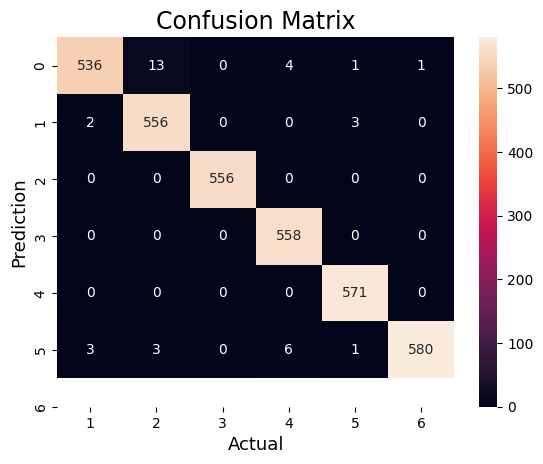

In [45]:
cm_knn = skme.confusion_matrix(male_label_test,y_test_knn)

sns.heatmap(cm_knn,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[0,1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [46]:
skme.recall_score(male_label_test,y_test_knn, average=None)

array([0.96576577, 0.99108734, 1.        , 1.        , 1.        ,
       0.97807757])

Sensitivity

In [47]:
skme.homogeneity_score(male_label_test,y_test_knn)

0.965405379583207

Homogeneity score

In [48]:
skme.completeness_score(male_label_test,y_test_knn)

0.9654114054204003

Completeness score

In [49]:
skme.precision_score(male_label_test,y_test_knn,average=None)

array([0.99075786, 0.97202797, 1.        , 0.98239437, 0.99131944,
       0.99827883])

Precision

In [50]:
skme.f1_score(male_label_test,y_test_knn, average=None)

array([0.97810219, 0.98146514, 1.        , 0.99111901, 0.9956408 ,
       0.98807496])

In [51]:
neigh.predict(sss)

array([6, 6])

F1-score

Female

In [52]:
find_k_knn(30,1, female_train_scaled, female_label_train, female_test_scaled, female_label_test)

Best k: 1
accuracy:  0.9841082989994114


Find the optimal k.

In [53]:
neigh_fem = KNeighborsClassifier(n_neighbors=1)

Initialize the KNN. 

In [54]:
neigh_fem.fit(female_train_scaled, female_label_train)


KNeighborsClassifier(n_neighbors=1)

Import the training set. 

In [55]:
y_test_fem_knn = neigh_fem.predict(female_test_scaled)
neigh_fem.score(female_test_scaled, female_label_test)

0.9841082989994114

Test the model, get accuracy. 

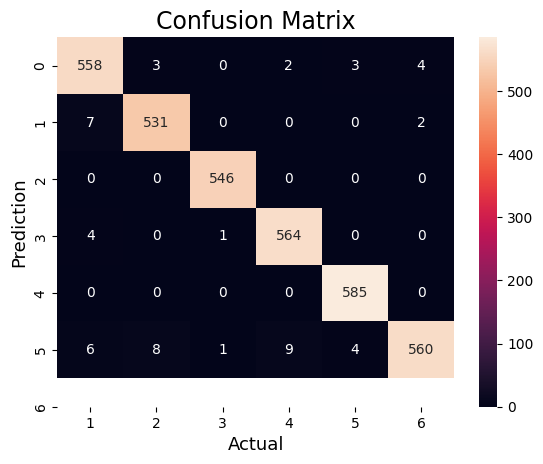

In [56]:
cm_knn_fem = skme.confusion_matrix(female_label_test,y_test_fem_knn)

sns.heatmap(cm_knn_fem,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[0,1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [57]:
skme.recall_score(female_label_test,y_test_fem_knn, average=None)

array([0.97894737, 0.98333333, 1.        , 0.99121265, 1.        ,
       0.95238095])

Sensitivity

In [58]:
skme.homogeneity_score(female_label_test,y_test_fem_knn)

0.9492058595035631

Homogeneity score

In [59]:
skme.completeness_score(female_label_test,y_test_fem_knn)

0.9491766026989532

Completeness score

In [60]:
skme.precision_score(female_label_test,y_test_fem_knn, average=None)

array([0.97043478, 0.9797048 , 0.99635036, 0.98086957, 0.98817568,
       0.98939929])

Precision

In [61]:
skme.f1_score(female_label_test,y_test_fem_knn, average=None)

array([0.97467249, 0.98151571, 0.99817185, 0.98601399, 0.99405268,
       0.97053726])

F1-score

Pregnant

In [62]:
find_k_knn(30,1, preg_train_scaled, preg_label_train, preg_test_scaled, preg_label_test)

Best k: 1
accuracy:  0.9908769864626251


Find the optimal k.

In [63]:
neigh_preg = KNeighborsClassifier(n_neighbors=1)

Initialize KNN. 

In [64]:
neigh_preg.fit(preg_train_scaled, preg_label_train)


KNeighborsClassifier(n_neighbors=1)

Import the training set. 

In [65]:
y_test_preg_knn = neigh_preg.predict(preg_test_scaled)
neigh_preg.score(preg_test_scaled, preg_label_test)

0.9908769864626251

Test the model, get accuracy. 

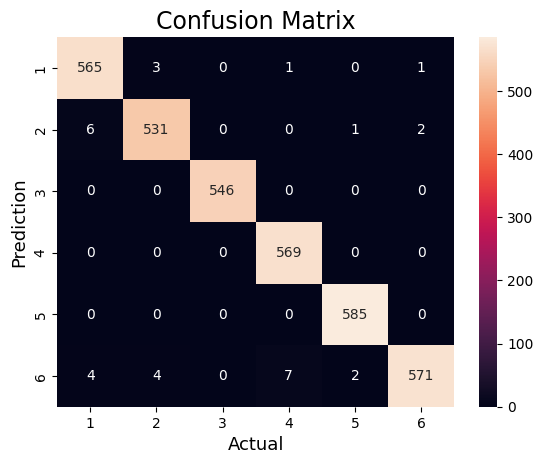

In [66]:
cm_knn_preg = skme.confusion_matrix(preg_label_test,y_test_preg_knn)

sns.heatmap(cm_knn_preg,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [67]:
skme.recall_score(preg_label_test,y_test_preg_knn, average=None)

array([0.99122807, 0.98333333, 1.        , 1.        , 1.        ,
       0.97108844])

Sensitivity

In [68]:
skme.homogeneity_score(preg_label_test,y_test_preg_knn)

0.9694620869816736

Homogeneity score

In [69]:
skme.completeness_score(preg_label_test,y_test_preg_knn)

0.9694611283642741

Completeness score

In [70]:
skme.precision_score(preg_label_test,y_test_preg_knn, average=None)

array([0.9826087 , 0.98698885, 1.        , 0.98613518, 0.99489796,
       0.99477352])

Precision

In [71]:
skme.f1_score(preg_label_test,y_test_preg_knn, average=None)

array([0.98689956, 0.9851577 , 1.        , 0.9930192 , 0.99744246,
       0.9827883 ])

F1 score

### K-mean

In [72]:
def act_label(y_kmeans, labels):
    
    act_label = np.copy(y_kmeans)
    for s in range(7):
        inde = np.where(y_kmeans == s)
        dd = labels.iloc[inde].value_counts(sort=True,ascending=False)
        if dd.shape[0] > 0:
            act_label[y_kmeans == s] = dd.index[0]
    return act_label

Determine the actual label of the cluster. 

male

In [73]:
kmeans_mal = KMeans(n_clusters=6)

kmeans_mal.fit(male_train_scaled)
y_kmeans_male = kmeans_mal.predict(male_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run Kmean to the training set. 

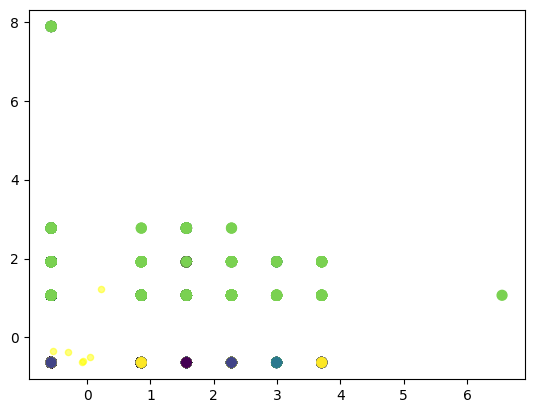

In [74]:
plt.scatter(male_train_scaled[:, 25], male_train_scaled[:,2109], c=y_kmeans_male, s=50)

centers1 = kmeans_mal.cluster_centers_
plt.scatter(centers1[:, 25], centers1[:,2109], c='yellow', s=20, alpha=0.5)

Graph about the centroids. 

In [75]:
y_kmeans_male_act = act_label(y_kmeans_male, male_label_train)

Determine the actual label for each cluster. 

<BarContainer object of 5 artists>

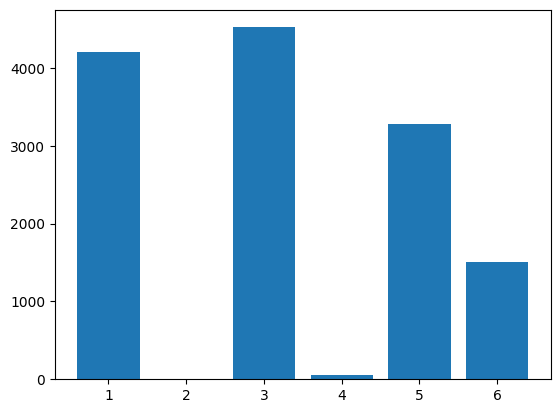

In [76]:
ee = np.unique(y_kmeans_male_act, return_counts=True)[1]
plt.bar(np.unique(y_kmeans_male_act),ee)

Determine the distribution of the classification. 

In [77]:
skme.accuracy_score(male_label_train, y_kmeans_male_act)

0.4721526447620451

Accuracy

In [78]:
skme.silhouette_score(male_train_scaled, y_kmeans_male_act)

0.003388164344002717

Silhouette score

In [79]:
skme.recall_score(male_label_test,y_test_knn,average=None)

array([0.96576577, 0.99108734, 1.        , 1.        , 1.        ,
       0.97807757])

Sensitivity

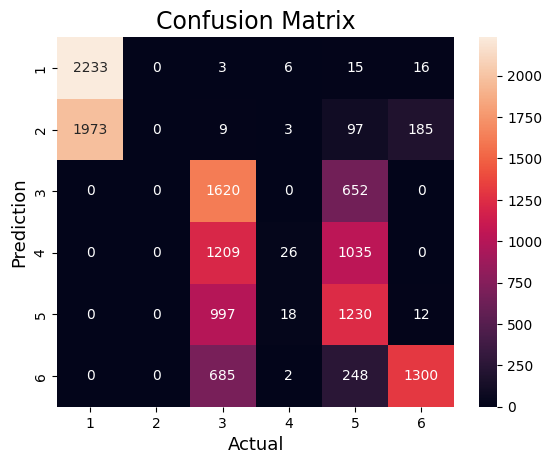

In [80]:
cm_km = skme.confusion_matrix(male_label_train,y_kmeans_male_act)

sns.heatmap(cm_km,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [81]:
skme.homogeneity_score(male_label_train, y_kmeans_male_act)

0.4102773876167673

Homogeneity score

In [82]:
skme.completeness_score(male_label_train, y_kmeans_male_act)

0.5489099121236394

Completeness score

In [83]:
skme.precision_score(male_label_train, y_kmeans_male_act,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.53090823, 0.        , 0.35816936, 0.47272727, 0.3753433 ,
       0.85922009])

Precision

In [84]:
skme.f1_score(male_label_train, y_kmeans_male_act,average=None)

array([0.6893039 , 0.        , 0.47682119, 0.02236559, 0.44452476,
       0.69370331])

F1 score

In [85]:
y_kmeans_male_test = kmeans_mal.predict(male_test_scaled)

Try the test set. 

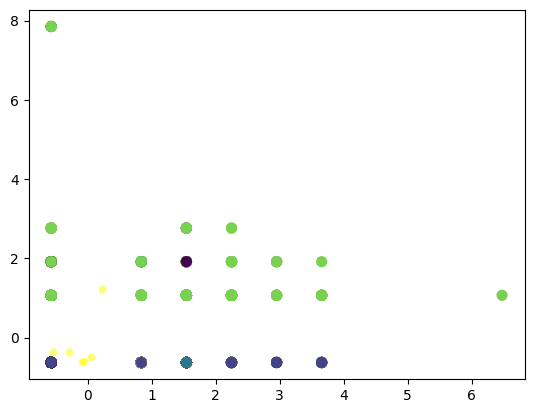

In [86]:
plt.scatter(male_test_scaled[:, 25], male_test_scaled[:,2109], c=y_kmeans_male_test, s=50)

centers1_test = kmeans_mal.cluster_centers_
plt.scatter(centers1_test[:, 25], centers1_test[:,2109], c='yellow', s=20, alpha=0.5)

Graph the centroid of the test set. 

In [87]:
y_kmeans_male_act_test = act_label(y_kmeans_male_test, male_label_test)

Get the actual label. 

<BarContainer object of 5 artists>

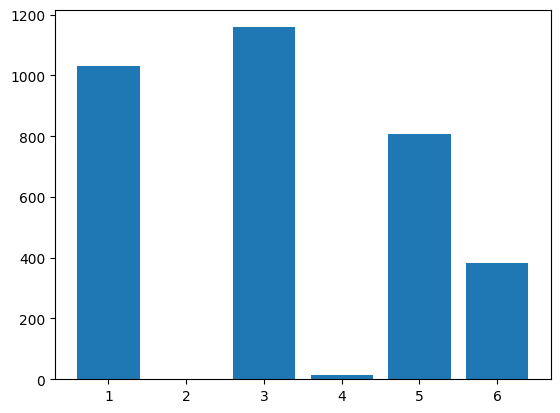

In [88]:
ee_test = np.unique(y_kmeans_male_act_test, return_counts=True)[1]
plt.bar(np.unique(y_kmeans_male_act_test),ee_test)


Graph the distribution. 

In [89]:
skme.accuracy_score(male_label_test, y_kmeans_male_act_test)

0.4687684148497348

Accuracy

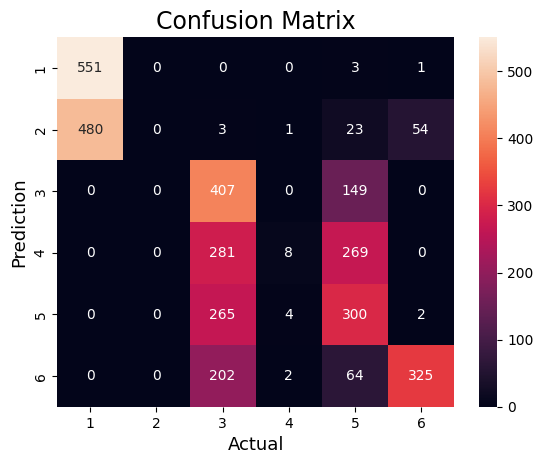

In [90]:
cm_km_test = skme.confusion_matrix(male_label_test,y_kmeans_male_act_test)

sns.heatmap(cm_km_test,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix.

In [91]:
skme.silhouette_score(male_test_scaled,y_kmeans_male_act_test)

0.004509887554785846

Silhouette score

In [92]:
skme.recall_score(male_label_test,y_test_knn,average=None)

array([0.96576577, 0.99108734, 1.        , 1.        , 1.        ,
       0.97807757])

Sensitivity

In [93]:
skme.homogeneity_score(male_label_test,y_kmeans_male_act_test)

0.4087994837718298

Homogeneity score

In [94]:
skme.completeness_score(male_label_train, y_kmeans_male_act)

0.5489099121236394

Completeness score

In [95]:
skme.precision_score(male_label_train, y_kmeans_male_act,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.53090823, 0.        , 0.35816936, 0.47272727, 0.3753433 ,
       0.85922009])

Precision

In [96]:
skme.f1_score(male_label_train, y_kmeans_male_act,average=None)

array([0.6893039 , 0.        , 0.47682119, 0.02236559, 0.44452476,
       0.69370331])

F1 score

In [97]:
kmeans_mal.predict(sss)

array([1, 1], dtype=int32)

Try predict the one record. 

Female

In [98]:
kmeans_fem = KMeans(n_clusters=6)

kmeans_fem.fit(female_train_scaled)
y_kmeans_fem = kmeans_fem.predict(female_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run Kmean to the training set. 

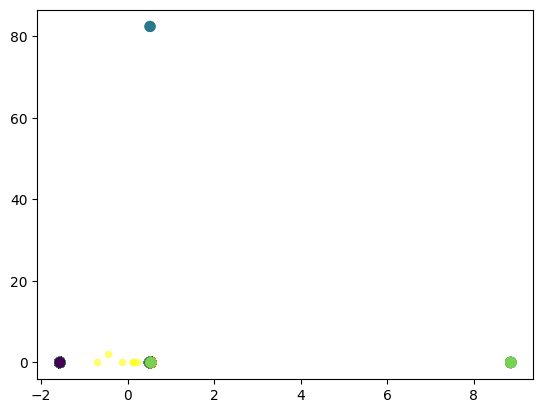

In [99]:
plt.scatter(female_train_scaled[:, 25], female_train_scaled[:,2109], c=y_kmeans_fem, s=50)

centers_fem = kmeans_fem.cluster_centers_
plt.scatter(centers_fem[:, 25], centers_fem[:,2109], c='yellow', s=20, alpha=0.5);

Show the centroid.

In [100]:
y_kmeans_female_act = act_label(y_kmeans_fem, female_label_train)

Get the actual label.

<BarContainer object of 4 artists>

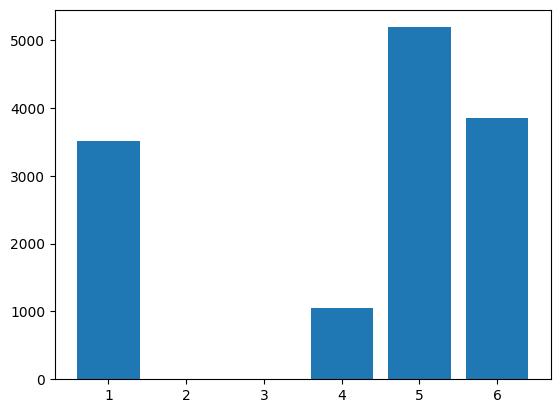

In [101]:
ff = np.unique(y_kmeans_female_act, return_counts=True)[1]
plt.bar(np.unique(y_kmeans_female_act),ff)

Show the distribution.

In [102]:
skme.accuracy_score(female_label_train, y_kmeans_female_act)

0.3980718280836032

Accuracy

In [103]:
skme.silhouette_score(female_train_scaled, y_kmeans_female_act)

0.025197504671293596

Silhouette score

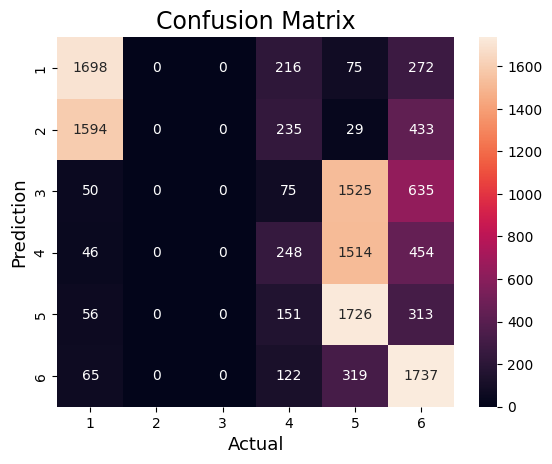

In [104]:
cm_km_fem = skme.confusion_matrix(female_label_train,y_kmeans_female_act)

sns.heatmap(cm_km_fem,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

The confusion matrix. 

In [105]:
skme.recall_score(female_label_train,y_kmeans_female_act,average=None)

array([0.75099513, 0.        , 0.        , 0.10963749, 0.76847729,
       0.77440927])

Sensitivity

In [106]:
skme.homogeneity_score(female_label_train,y_kmeans_female_act)

0.2554054717819001

Homogeneity

In [107]:
skme.completeness_score(female_label_train,y_kmeans_female_act)

0.359774352978259

Completeness

In [108]:
skme.precision_score(female_label_train,y_kmeans_female_act,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.48389855, 0.        , 0.        , 0.23686724, 0.33269082,
       0.45187305])

Precision

In [109]:
skme.f1_score(female_label_train,y_kmeans_female_act,average=None)

array([0.58856153, 0.        , 0.        , 0.14989423, 0.46435297,
       0.57072449])

F1-Score

In [110]:
y_kmeans_fem_test = kmeans_fem.predict(female_test_scaled)

Try the test set. 

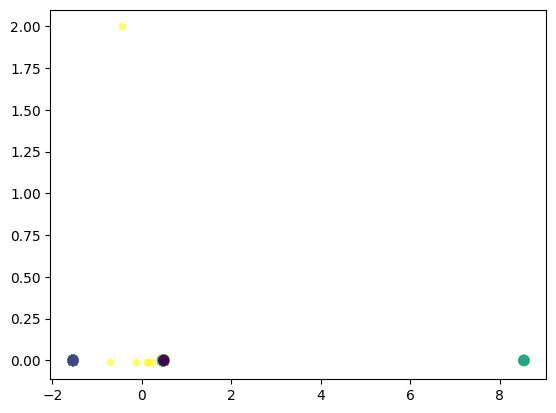

In [111]:
plt.scatter(female_test_scaled[:, 25], female_test_scaled[:,2109], c=y_kmeans_fem_test, s=50)

centers_fem_test = kmeans_fem.cluster_centers_
plt.scatter(centers_fem_test[:, 25], centers_fem_test[:,2109], c='yellow', s=20, alpha=0.5);

Graph the centroid

In [112]:
y_kmeans_female_act_test = act_label(y_kmeans_fem_test, female_label_test)

Get the actual label. 

In [113]:
skme.accuracy_score(female_label_test, y_kmeans_female_act_test)

0.39846968805179517

Accuracy

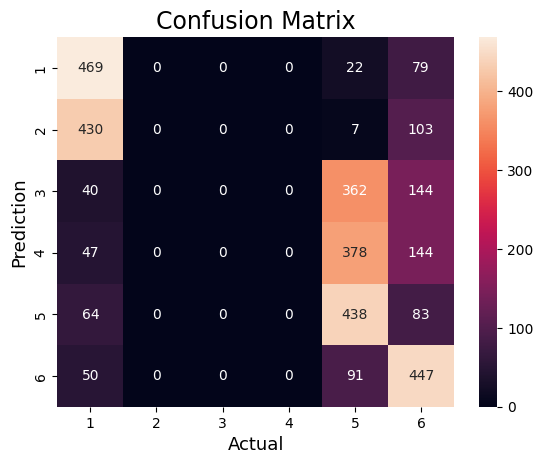

In [114]:
cm_km_fem_test = skme.confusion_matrix(female_label_test,y_kmeans_female_act_test)

sns.heatmap(cm_km_fem_test,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix. 

<BarContainer object of 3 artists>

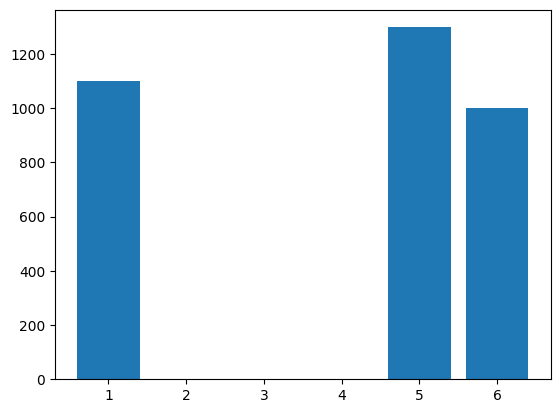

In [115]:
ff_test = np.unique(y_kmeans_female_act_test, return_counts=True)[1]
plt.bar(np.unique(y_kmeans_female_act_test),ff_test)

Show the distribution.

In [116]:
skme.f1_score(female_label_test,y_kmeans_female_act_test,average=None)

array([0.56167665, 0.        , 0.        , 0.        , 0.46521508,
       0.56297229])

F1-score

In [117]:
skme.silhouette_score(female_test_scaled, y_kmeans_female_act_test)

0.028033233011993005

Silhouette score

In [118]:
skme.recall_score(female_label_test,y_kmeans_female_act_test, average=None)

array([0.82280702, 0.        , 0.        , 0.        , 0.74871795,
       0.76020408])

Sensitivity

In [119]:
skme.homogeneity_score(female_label_test,y_kmeans_female_act_test)

0.2191410506557237

Homogeneity score

In [120]:
skme.completeness_score(female_label_test,y_kmeans_female_act_test)

0.35923544752762365

Completeness score

In [121]:
skme.precision_score(female_label_test,y_kmeans_female_act_test,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.42636364, 0.        , 0.        , 0.        , 0.33744222,
       0.447     ])

Precision

Pregnant

In [122]:
kmeans_preg = KMeans(n_clusters=6)

kmeans_preg.fit(preg_train_scaled)
y_kmeans_preg = kmeans_preg.predict(preg_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Run Kmean to the training set.

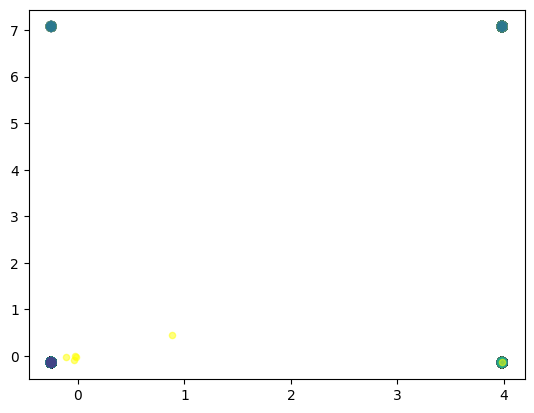

In [123]:
plt.scatter(preg_train_scaled[:, -2], preg_train_scaled[:,-1], c=y_kmeans_preg, s=50)

centers_preg = kmeans_preg.cluster_centers_
plt.scatter(centers_preg[:, -2], centers_preg[:,-1], c='yellow', s=20, alpha=0.5);

Graph the centroids. 

In [124]:
y_kmeans_preg_act = act_label(y_kmeans_preg, preg_label_train)

Get the actual label. 

In [125]:
skme.accuracy_score(preg_label_train, y_kmeans_preg_act)

0.29805710921401235

Accuracy

In [126]:
skme.silhouette_score(preg_train_scaled, y_kmeans_preg_act)

0.027569831426264672

Silhouette score

<BarContainer object of 4 artists>

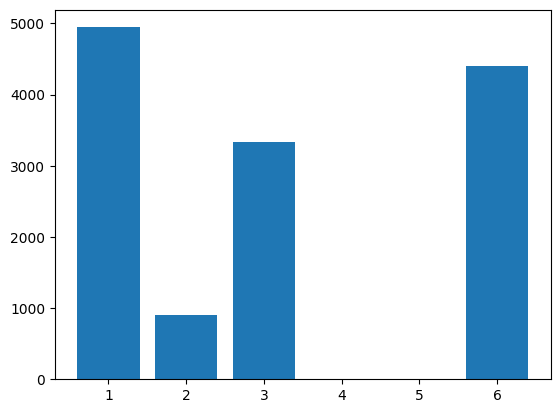

In [127]:
pp = np.unique(y_kmeans_preg_act, return_counts=True)[1]
plt.bar(np.unique(y_kmeans_preg_act),pp)

Show the distribution. 

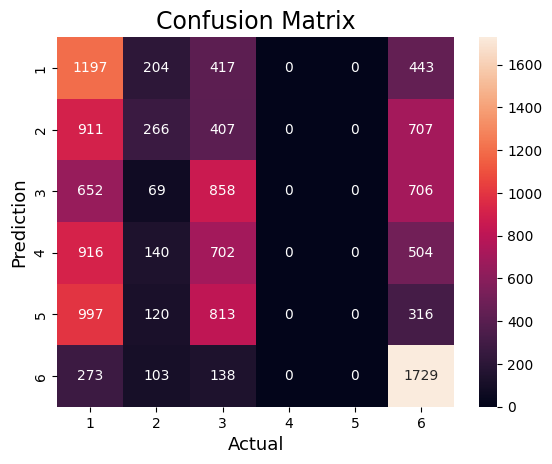

In [128]:
cm_km_preg = skme.confusion_matrix(preg_label_train,y_kmeans_preg_act)

sns.heatmap(cm_km_preg,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [129]:
skme.recall_score(preg_label_train,y_kmeans_preg_act,average=None)

array([0.52941176, 0.1161065 , 0.37549234, 0.        , 0.        ,
       0.77084262])

Sensitivity

In [130]:
skme.homogeneity_score(preg_label_train,y_kmeans_preg_act)

0.06599124964964856

Homogeneity

In [131]:
skme.completeness_score(preg_label_train,y_kmeans_preg_act)

0.09400014184651648

Completeness

In [132]:
skme.precision_score(preg_label_train,y_kmeans_preg_act,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.24201375, 0.29490022, 0.25727136, 0.        , 0.        ,
       0.39250851])

Precision

In [133]:
skme.f1_score(preg_label_train,y_kmeans_preg_act,average=None)

array([0.33217705, 0.16661447, 0.30533808, 0.        , 0.        ,
       0.52015644])

F1-Score

In [134]:
y_kmeans_preg_test = kmeans_preg.predict(preg_test_scaled)

Try the test set. 

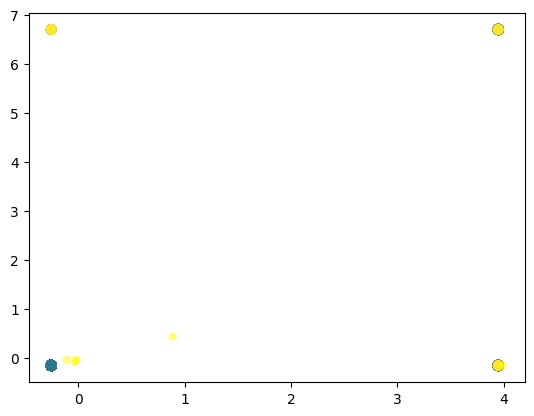

In [135]:
plt.scatter(preg_test_scaled[:, -2], preg_test_scaled[:,-1], c=y_kmeans_preg_test, s=50)

centers_preg_test = kmeans_preg.cluster_centers_
plt.scatter(centers_preg_test[:, -2], centers_preg_test[:,-1], c='yellow', s=20, alpha=0.5)

Graph the centroid

In [136]:
y_kmeans_preg_act_test = act_label(y_kmeans_preg_test, preg_label_test)

Get the actual label. 

In [137]:
skme.accuracy_score(preg_label_test, y_kmeans_preg_act_test)

0.30047086521483224

Accuracy

<BarContainer object of 4 artists>

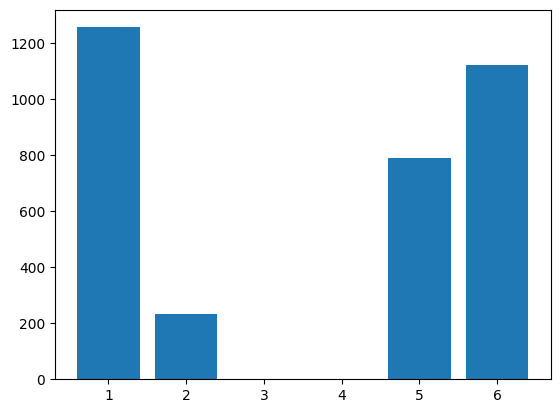

In [138]:
pp_test = np.unique(y_kmeans_preg_act_test, return_counts=True)[1]
plt.bar(np.unique(y_kmeans_preg_act_test),pp_test)

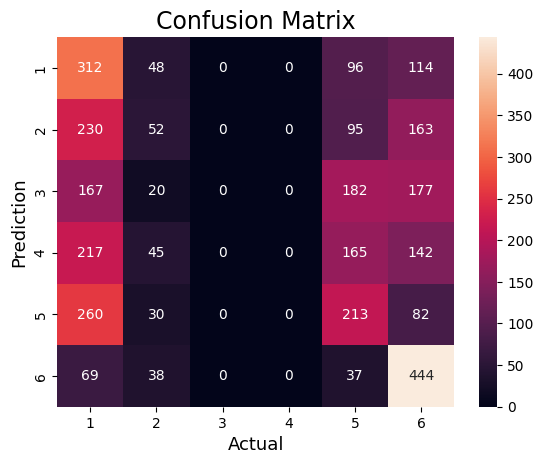

In [139]:
cm_km_preg_test = skme.confusion_matrix(preg_label_test,y_kmeans_preg_act_test)

sns.heatmap(cm_km_preg_test,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [140]:
skme.silhouette_score(preg_test_scaled, y_kmeans_preg_act_test)

0.028111602052344663

Silhouette score.

In [141]:
skme.recall_score(preg_label_test,y_kmeans_preg_act_test,average=None)

array([0.54736842, 0.0962963 , 0.        , 0.        , 0.36410256,
       0.75510204])

Sensitivity

In [142]:
skme.homogeneity_score(preg_label_test,y_kmeans_preg_act_test)

0.06349256886578157

Homogeneity

In [143]:
skme.completeness_score(preg_label_test,y_kmeans_preg_act_test)

0.09051954532441771

Completeness

In [144]:
skme.precision_score(preg_label_test,y_kmeans_preg_act_test,average=None)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.24860558, 0.22317597, 0.        , 0.        , 0.27030457,
       0.39572193])

Precision

In [145]:
skme.f1_score(preg_label_test,y_kmeans_preg_act_test,average=None)

array([0.34191781, 0.13454075, 0.        , 0.        , 0.31026948,
       0.51929825])

F1-Score

### ANN

In [146]:
def six_to_one(test_result):
    ddd = test_result[:,:6].argmax(1) + 1
    return ddd

Convert the labels with 6 columns to one. 

In [147]:
male_label_train_ann = pd.get_dummies(male_label_train, dtype='int')
male_label_test_ann = pd.get_dummies(male_label_test, dtype='int')

female_label_train_ann = pd.get_dummies(female_label_train, dtype='int')
female_label_test_ann = pd.get_dummies(female_label_test, dtype='int')

preg_label_train_ann = pd.get_dummies(preg_label_train, dtype='int')
preg_label_test_ann = pd.get_dummies(preg_label_test, dtype='int')

Process the labels. 

Male

In [148]:
ann_male = tf.keras.models.Sequential()

2023-12-05 10:42:41.504013: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1638] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13797 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:61:00.0, compute capability: 7.5


Init the model. 

In [149]:
ann_male.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_male.add(tf.keras.layers.Dropout(.3))
ann_male.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann_male.add(tf.keras.layers.Dense(units=6, activation='softmax'))

Add layers. 

In [150]:
adam1 = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='adam1',
)

ann_male.compile(optimizer = adam1, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

Tune the optimizer

In [151]:
ann_male.build((None,2526))
ann_male.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 20216     
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 20)                180       
                                                                 
 dense_2 (Dense)             (None, 6)                 126       
                                                                 
Total params: 20,522
Trainable params: 20,522
Non-trainable params: 0
_________________________________________________________________


Summary of model ann_female. 

In [152]:
ann_male.fit(male_train_scaled, male_label_train_ann, batch_size = 32, epochs = 40)

Epoch 1/40


2023-12-05 10:42:42.942236: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f999c804f90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-05 10:42:42.942272: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2023-12-05 10:42:42.946401: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-05 10:42:42.962997: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8901
2023-12-05 10:42:43.086796: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


425/425 [==============================] - 3s 4ms/step - loss: 0.7422 - accuracy: 0.7422
Epoch 2/40
425/425 [==============================] - 2s 4ms/step - loss: 0.3754 - accuracy: 0.8815
Epoch 3/40
425/425 [==============================] - 2s 4ms/step - loss: 0.2719 - accuracy: 0.9058
Epoch 4/40
425/425 [==============================] - 2s 4ms/step - loss: 0.2722 - accuracy: 0.9154
Epoch 5/40
425/425 [==============================] - 2s 4ms/step - loss: 0.2100 - accuracy: 0.9274
Epoch 6/40
425/425 [==============================] - 2s 4ms/step - loss: 0.2130 - accuracy: 0.9325
Epoch 7/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1694 - accuracy: 0.9453
Epoch 8/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1756 - accuracy: 0.9477
Epoch 9/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1704 - accuracy: 0.9488
Epoch 10/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1540 - accuracy: 0.9562
Epoch 11/4

In [153]:
ann_male.evaluate(male_test_scaled, male_label_test_ann)

107/107 [==============================] - 0s 2ms/step - loss: 0.0137 - accuracy: 0.9991


[0.013730133883655071, 0.999116063117981]

In [154]:
test = ann_male.predict(male_test_scaled)

107/107 [==============================] - 0s 1ms/step


In [155]:
y_ann_male_test = six_to_one(test)

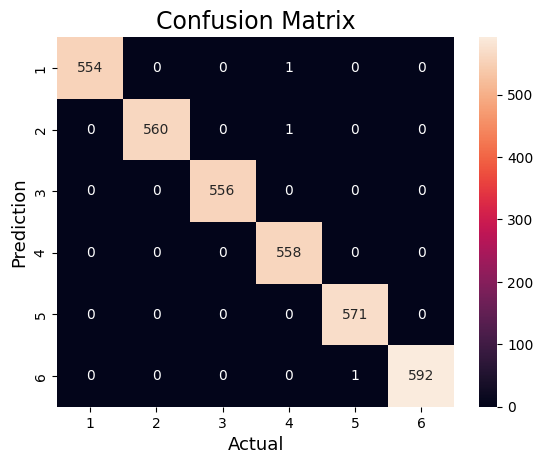

In [156]:
cm_ann_male = skme.confusion_matrix(male_label_test,y_ann_male_test)

sns.heatmap(cm_ann_male,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [157]:
skme.recall_score(male_label_test,y_ann_male_test,average=None)

array([0.9981982 , 0.99821747, 1.        , 1.        , 1.        ,
       0.99831366])

Sensitivity

In [158]:
skme.homogeneity_score(male_label_test,y_ann_male_test)

0.9963816654915466

Homogeneity

In [159]:
skme.completeness_score(male_label_test,y_ann_male_test)

0.9963766372666519

Completeness

In [160]:
skme.precision_score(male_label_test,y_ann_male_test,average=None)

array([1.        , 1.        , 1.        , 0.99642857, 0.99825175,
       1.        ])

Precision

In [161]:
skme.f1_score(male_label_test,y_kmeans_male_act_test,average=None)

array([0.69482976, 0.        , 0.47491249, 0.02792321, 0.4350979 ,
       0.66666667])

F1-Score

In [162]:
six_to_one(ann_male.predict(sss))

1/1 [==============================] - 0s 20ms/step


array([6, 6])

Try with one record. 

In [193]:
ann_male.save_weights('./ann_male')

Save the model. 

Female

In [163]:
ann_female = tf.keras.models.Sequential()

Init the model. 

In [164]:
ann_female.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_female.add(tf.keras.layers.Dropout(.3))
ann_female.add(tf.keras.layers.Dense(units=20, activation='relu'))
ann_female.add(tf.keras.layers.Dense(units=6, activation='softmax'))

Add layers.

In [165]:
adam2 = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='adam1',
)

ann_female.compile(optimizer = adam2, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

Tune the optimizer

In [166]:
ann_female.build((None,2517))
ann_female.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 20144     
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 20)                180       
                                                                 
 dense_5 (Dense)             (None, 6)                 126       
                                                                 
Total params: 20,450
Trainable params: 20,450
Non-trainable params: 0
_________________________________________________________________


Summary of model ann_female. 

In [167]:
ann_female.fit(female_train_scaled, female_label_train_ann, batch_size = 32, epochs = 40)

Epoch 1/40
425/425 [==============================] - 3s 4ms/step - loss: 0.9468 - accuracy: 0.6877
Epoch 2/40
425/425 [==============================] - 2s 4ms/step - loss: 0.4203 - accuracy: 0.8820
Epoch 3/40
425/425 [==============================] - 2s 4ms/step - loss: 0.2724 - accuracy: 0.9112
Epoch 4/40
425/425 [==============================] - 2s 4ms/step - loss: 0.2223 - accuracy: 0.9304
Epoch 5/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1972 - accuracy: 0.9389
Epoch 6/40
425/425 [==============================] - 2s 4ms/step - loss: 0.2010 - accuracy: 0.9440
Epoch 7/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1523 - accuracy: 0.9561
Epoch 8/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1566 - accuracy: 0.9570
Epoch 9/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1334 - accuracy: 0.9645
Epoch 10/40
425/425 [==============================] - 2s 4ms/step - loss: 0.1281 - accuracy: 0.9678

Train the model

In [168]:
ann_female.evaluate(female_test_scaled, female_label_test_ann)

107/107 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9994


[0.010870847851037979, 0.999411404132843]

Evaluate the accuracy. 

In [169]:
res_fem = ann_female.predict(female_test_scaled)

107/107 [==============================] - 0s 1ms/step


In [170]:
y_ann_female_test = six_to_one(res_fem)

Reverse the get_dummy.

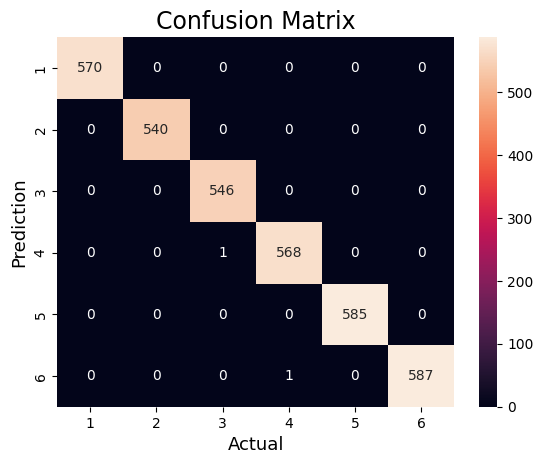

In [171]:
cm_ann_female = skme.confusion_matrix(female_label_test,y_ann_female_test)

sns.heatmap(cm_ann_female,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [172]:
skme.recall_score(female_label_test,y_ann_female_test,average=None)

array([1.        , 1.        , 1.        , 0.99824253, 1.        ,
       0.99829932])

Sensitivity

In [173]:
skme.homogeneity_score(female_label_test,y_ann_female_test)

0.997593672413743

Homogeneity

In [174]:
skme.completeness_score(female_label_test,y_ann_female_test)

0.9975818158559072

Completeness

In [175]:
skme.precision_score(female_label_test,y_ann_female_test,average=None)

array([1.        , 1.        , 0.99817185, 0.99824253, 1.        ,
       1.        ])

Precision

In [176]:
skme.f1_score(female_label_test,y_ann_female_test,average=None)

array([1.        , 1.        , 0.99908509, 0.99824253, 1.        ,
       0.99914894])

F1-Score

In [192]:
ann_female.save_weights('./ann_female')

Pregnant

In [177]:
ann_preg = tf.keras.models.Sequential()

Init the model. 

In [178]:
ann_preg.add(tf.keras.layers.Dense(units=8, activation='relu'))
ann_preg.add(tf.keras.layers.Dense(units=16, activation='relu'))

# ann_preg.add(tf.keras.layers.Dropout(.1))


ann_preg.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann_preg.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann_preg.add(tf.keras.layers.Dense(units=32, activation='relu'))

ann_preg.add(tf.keras.layers.Dense(units=32, activation='relu'))
ann_preg.add(tf.keras.layers.Dropout(.7))

ann_preg.add(tf.keras.layers.Dense(units=6, activation='softmax'))

Add layers

In [179]:
adam3 = tf.keras.optimizers.Adam(
    learning_rate=0.001,
    weight_decay=0.004,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    use_ema=False,
    ema_momentum=0.99,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='adam3',
)

ann_preg.compile(optimizer = adam3, loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

Tune the hyperparameter

In [180]:
ann_preg.build((None, 2517))
ann_preg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 20144     
                                                                 
 dense_7 (Dense)             (None, 16)                144       
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 32)                1056      
                                                                 
 dense_11 (Dense)            (None, 32)                1056      
                                                                 
 dropout_2 (Dropout)         (None, 32)               

Show the summary of the model. 

In [181]:
ann_preg.fit(preg_train_scaled, preg_label_train_ann, batch_size = 64, epochs = 100)

Epoch 1/100
213/213 [==============================] - 3s 5ms/step - loss: 1.1755 - accuracy: 0.4906
Epoch 2/100
213/213 [==============================] - 1s 5ms/step - loss: 0.3591 - accuracy: 0.8458
Epoch 3/100
213/213 [==============================] - 1s 5ms/step - loss: 0.2482 - accuracy: 0.8912
Epoch 4/100
213/213 [==============================] - 1s 5ms/step - loss: 0.2115 - accuracy: 0.8989
Epoch 5/100
213/213 [==============================] - 1s 5ms/step - loss: 0.1899 - accuracy: 0.9026
Epoch 6/100
213/213 [==============================] - 1s 5ms/step - loss: 0.2220 - accuracy: 0.9040
Epoch 7/100
213/213 [==============================] - 1s 5ms/step - loss: 0.1692 - accuracy: 0.9132
Epoch 8/100
213/213 [==============================] - 1s 5ms/step - loss: 0.1684 - accuracy: 0.9106
Epoch 9/100
213/213 [==============================] - 1s 5ms/step - loss: 0.1581 - accuracy: 0.9171
Epoch 10/100
213/213 [==============================] - 1s 5ms/step - loss: 0.1728 - accura

Train the model

In [182]:
ann_preg.evaluate(preg_test_scaled, preg_label_test_ann)

107/107 [==============================] - 0s 2ms/step - loss: 0.0096 - accuracy: 0.9971


[0.009592972695827484, 0.9970570802688599]

In [183]:
res_preg = ann_preg.predict(preg_test_scaled)

107/107 [==============================] - 0s 2ms/step


Evaluate the accuracy. overfitting.

In [184]:
y_ann_preg_test = six_to_one(res_preg)

Reverse the get_dummy. 

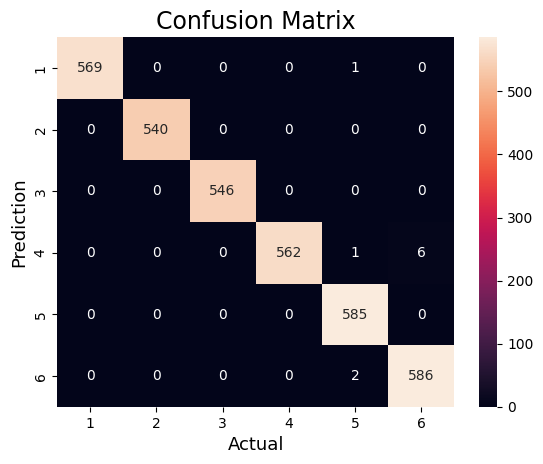

In [185]:
cm_ann_preg = skme.confusion_matrix(preg_label_test,y_ann_preg_test)

sns.heatmap(cm_ann_preg,annot=True,fmt='g',xticklabels=[1,2,3,4,5,6],yticklabels=[1,2,3,4,5,6])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

Confusion matrix

In [186]:
skme.recall_score(preg_label_test,y_ann_preg_test,average=None)

array([0.99824561, 1.        , 1.        , 0.98769772, 1.        ,
       0.99659864])

Sensitivity

In [187]:
skme.homogeneity_score(preg_label_test,y_ann_preg_test)

0.9898739844548626

Homogeneity

In [188]:
skme.completeness_score(preg_label_test,y_ann_preg_test)

0.9899247092928891

Completeness

In [189]:
skme.precision_score(preg_label_test,y_ann_preg_test,average=None)

array([1.        , 1.        , 1.        , 1.        , 0.99320883,
       0.98986486])

Precision

In [190]:
skme.f1_score(preg_label_test,y_ann_preg_test,average=None)

array([0.99912204, 1.        , 1.        , 0.99381079, 0.99659284,
       0.99322034])

F1-Score

In [191]:
ann_preg.save_weights('./ann_preg')

Save the model. 